# Data Analysis

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loan_2017 data

In [2]:
df = pd.read_csv('/Users/yizh/Downloads/loan_2017.csv') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443579 entries, 0 to 443578
Columns: 108 entries, mthssincerecentbc to loanstatus
dtypes: float64(88), int64(1), object(19)
memory usage: 365.5+ MB


In [7]:
df.shape

(443579, 108)

## Find categorical and numerical data

In [9]:
df.isnull().sum()

mthssincerecentbc                 5433
term                                 0
memberid                        443579
tothicredlim                         0
numacctsever120pd                    0
totalrevhilim                        0
mthssincercntil                  13126
accopenpast24mths                    0
secapprevolutil                 405183
mortacc                              0
secappopenactil                 404543
bcutil                            5948
totalacc                             0
purpose                              0
totalbclimit                         0
numactvbctl                          0
annualincjoint                  401154
totalbalil                           0
mthssincelastdelinq             222680
delinq2yrs                           0
numtl120dpd2m                    22254
title                                0
ficorangelow                         0
inqlast6mths                         0
numrevaccts                          0
secappcollections12mthsex

In [3]:
cat_data=df.select_dtypes(include='object').columns.values.tolist()

In [4]:
num_data=df.drop(cat_data, axis=1).columns.values.tolist()

In [47]:
nul_data=[]
for n in df.columns:
    if df[n].isnull().sum()==df.shape[0]:
        nul_data.append(n)

In [48]:
nul_data

['memberid', 'desc']

In [56]:
#remove null data
num_data.remove('memberid')
num_data.remove('desc')
num_data.remove('dtijoint')                       
num_data.remove('secappopenacc') 
num_data.remove('secapprevolutil')
num_data.remove('secappopenactil')
num_data.remove('annualincjoint')
num_data.remove('secappcollections12mthsexmed')
num_data.remove('secappmortacc')
num_data.remove('secappficorangelow')

In [6]:
cat_data.remove('url')
cat_data.remove('loanstatus')

In [66]:
df_cat=df[cat_data]

for col in df_cat:
    print(df_cat[col].isnull().sum())
    print(df_cat[col].value_counts())

0
 36 months    320419
 60 months    123160
Name: term, dtype: int64
0
debt_consolidation    245083
credit_card            91466
home_improvement       34693
other                  33057
major_purchase         11140
medical                 6885
car                     5357
small_business          4938
vacation                4026
moving                  3644
house                   2997
renewable_energy         291
educational                1
wedding                    1
Name: purpose, dtype: int64
0
Debt consolidation         245081
Credit card refinancing     91473
Home improvement            34692
Other                       33054
Major purchase              11136
Medical expenses             6884
Car financing                5361
Business                     4941
Vacation                     4026
Moving and relocation        3643
Home buying                  2997
Green loan                    290
Learning and training           1
Name: title, dtype: int64
0
 16.02%    20504
 11.99

112xx    4856
750xx    4683
945xx    4613
606xx    4038
300xx    4001
331xx    3616
770xx    3562
070xx    3544
891xx    3395
117xx    3385
104xx    3384
330xx    3310
100xx    3168
900xx    3021
917xx    2960
852xx    2848
925xx    2671
604xx    2557
334xx    2538
601xx    2494
853xx    2454
913xx    2413
926xx    2353
600xx    2341
481xx    2309
921xx    2294
760xx    2235
080xx    2212
113xx    2202
207xx    2162
         ... 
966xx       2
821xx       2
008xx       2
942xx       2
987xx       2
092xx       2
909xx       2
663xx       1
523xx       1
896xx       1
854xx       1
858xx       1
885xx       1
528xx       1
205xx       1
696xx       1
348xx       1
698xx       1
969xx       1
964xx       1
709xx       1
621xx       1
901xx       1
929xx       1
861xx       1
204xx       1
506xx       1
009xx       1
093xx       1
694xx       1
Name: zipcode, Length: 905, dtype: int64
0
MORTGAGE    217123
RENT        173643
OWN          52414
ANY            395
NONE             4
Name: ho

,fundedamnt,loanamnt
0,7100.0,7100.0
1,6800.0,6800.0
2,9900.0,9900.0
3,14000.0,14000.0
4,15400.0,15400.0
5,10000.0,10000.0
6,10000.0,10000.0
7,3025.0,3025.0
8,9000.0,9000.0
9,12000.0,12000.0


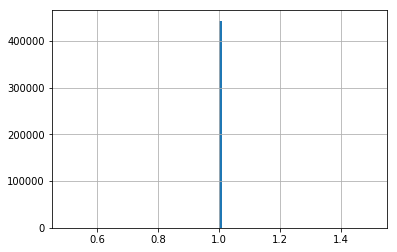

In [7]:
df.ratio=df.fundedamnt/df.loanamnt.astype(float,3)
df.ratio.hist(bins=100)
df[['fundedamnt','loanamnt']][:10]

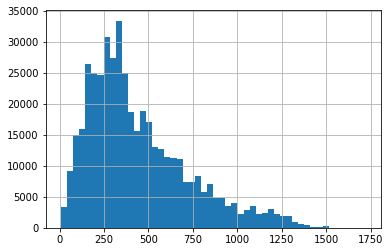

In [68]:
df.installment.hist(bins=50)

In [8]:
# take 36 months term loan
df_36=df[df["term"]==' 36 months']

In [71]:
df_36.head()

,mthssincerecentbc,term,memberid,tothicredlim,numacctsever120pd,totalrevhilim,mthssincercntil,accopenpast24mths,secapprevolutil,mortacc,...,mosinrcnttl,numtloppast12m,homeownership,numactvrevtl,desc,initialliststatus,openacc,chargeoffwithin12mths,issued,loanstatus
0,162.0,36 months,NaN,45619.0,0.0,31700.0,21.0,3.0,NaN,0.0,...,13.0,0.0,RENT,5.0,NaN,w,9.0,0.0,Mar-2017,Fully Paid
1,20.0,36 months,NaN,55700.0,0.0,23100.0,3.0,7.0,NaN,0.0,...,0.0,4.0,RENT,4.0,NaN,w,9.0,0.0,Mar-2017,Current
2,36.0,36 months,NaN,184966.0,0.0,19100.0,22.0,1.0,NaN,1.0,...,22.0,0.0,MORTGAGE,3.0,NaN,f,10.0,0.0,Mar-2017,Fully Paid
5,24.0,36 months,NaN,88045.0,0.0,15800.0,16.0,2.0,NaN,0.0,...,16.0,0.0,RENT,1.0,NaN,f,12.0,0.0,Mar-2017,Fully Paid
6,51.0,36 months,NaN,89165.0,0.0,18200.0,11.0,5.0,NaN,0.0,...,6.0,2.0,RENT,4.0,NaN,f,9.0,0.0,Mar-2017,Fully Paid


In [9]:
df_36 = df_36.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' ")

In [10]:
# change loanstatus to 0 and 1
n_map = {'Charged Off':1, 
          'Fully Paid':0}
df_36['loanstatus'] = df_36['loanstatus'].replace(n_map)

## Data Visulization

In [11]:
#Distribution of loanstatus in 36-month loan
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

trace = go.Pie(values=df_36['loanstatus'].value_counts(), labels=['Fully Paid','Charged Off'] )
layout = dict(title = 'Distribution of loanstatus')         
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [11]:
dummy_data = ["term","title", "emplength", "addrstate", 'homeownership', 
              "grade", "subgrade", 'applicationtype', 'initialliststatus', "issued"]

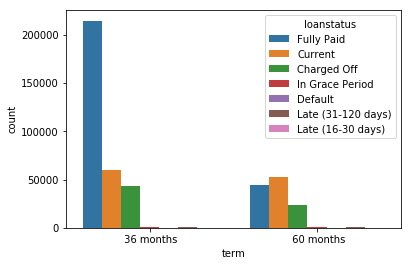

In [97]:
#loanstatus and different loan terms
sns.countplot(x='term', hue='loanstatus', data=df)

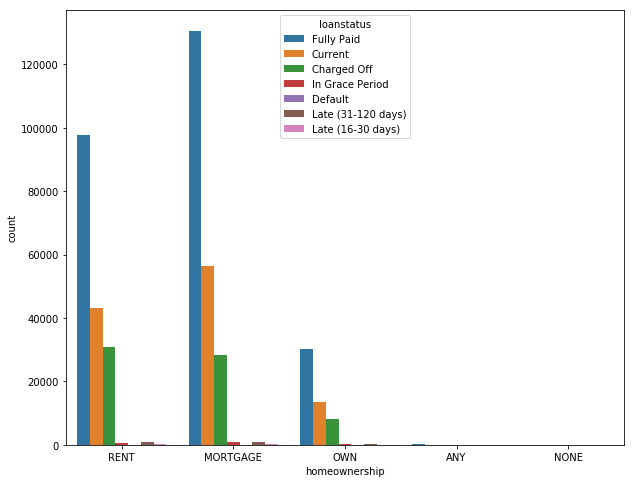

In [103]:
#loanstatus and home ownership
plt.figure(figsize=(10,8))
sns.countplot(x='homeownership', hue='loanstatus', data=df)

<Figure size 720x576 with 0 Axes>

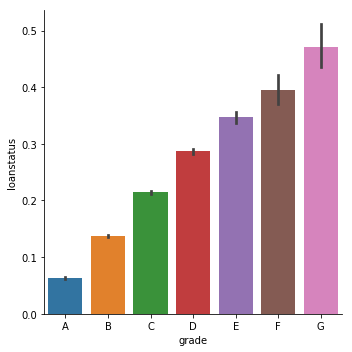

In [110]:
plt.figure(figsize=(10,8))
sns.catplot(x="grade", y="loanstatus", kind="bar", data=df_36, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

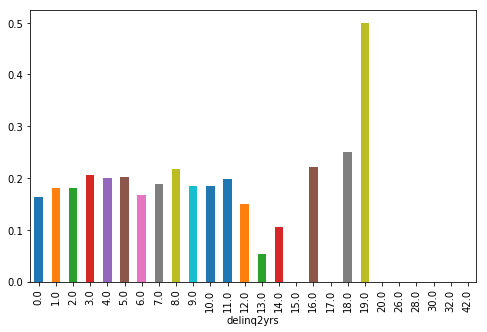

In [114]:
#delinq in past 2 years is 13 has the lowest mean of loanstatus, while 19 is the most possible to be charged off
df1 = df_36.groupby(['delinq2yrs'])['loanstatus'].mean()
df1.plot(kind='bar', figsize=(8, 5))

In [13]:
np.sort(df.subgrade.unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

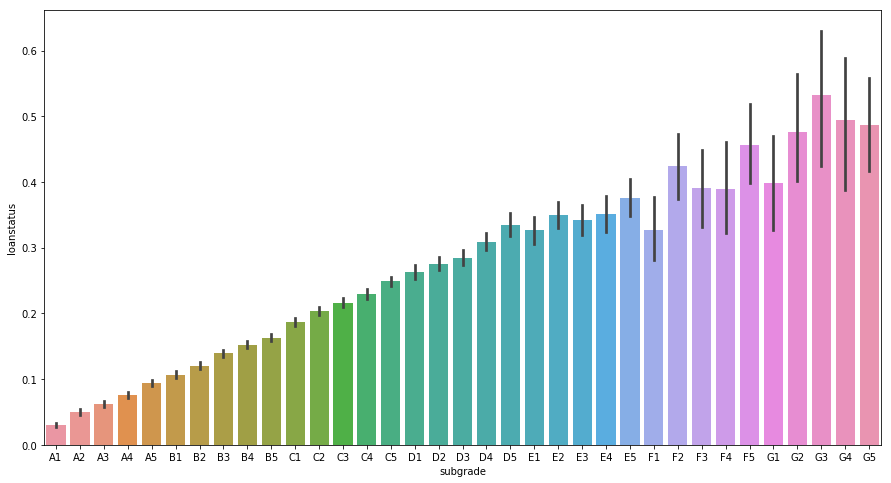

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x='subgrade', y='loanstatus', data=df_36, order = np.sort(df.subgrade.unique()))

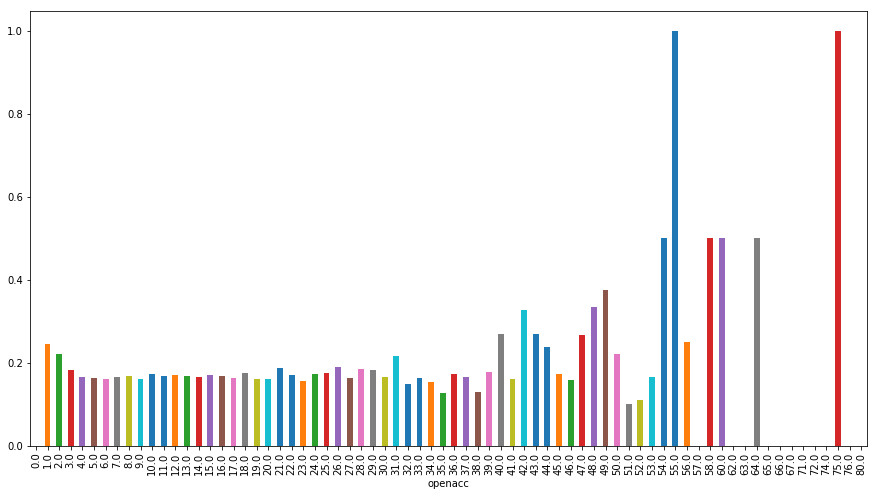

In [23]:
#mean of loanstatus and number of openacc
df2 = df_36.groupby(['openacc'])['loanstatus'].mean()
df2.plot(kind='bar', figsize=(15, 8))

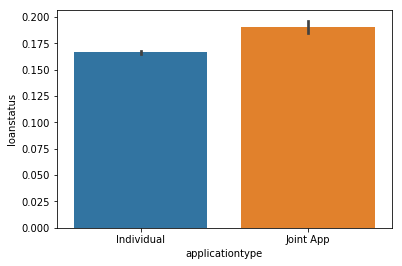

In [24]:
sns.barplot(x='applicationtype', y='loanstatus', data=df_36)

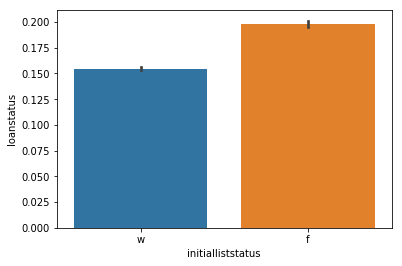

In [25]:
sns.barplot(x='initialliststatus', y='loanstatus', data=df_36)

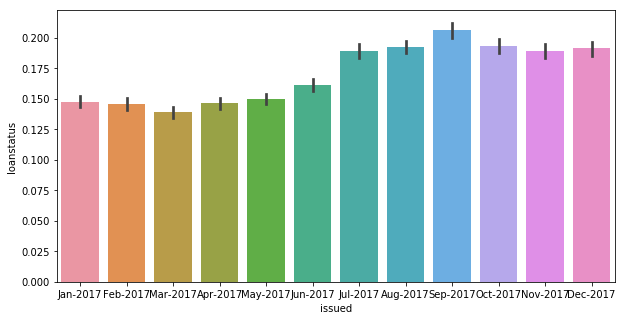

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x='issued', y='loanstatus', data=df_36, order = ['Jan-2017','Feb-2017','Mar-2017','Apr-2017','May-2017','Jun-2017','Jul-2017','Aug-2017','Sep-2017','Oct-2017','Nov-2017','Dec-2017'])

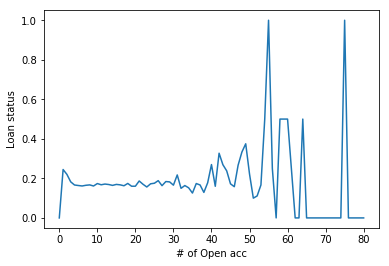

In [12]:
# loan status with openacc
plt.figure()
plt.plot(df_36.groupby('openacc').mean()['loanstatus'])
plt.xlabel('# of Open acc')
plt.ylabel('Loan status')
plt.show()

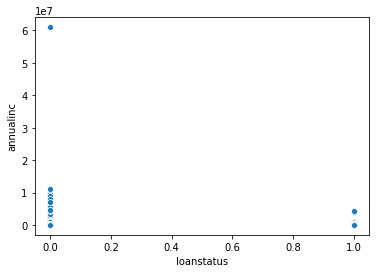

In [29]:
sns.scatterplot(df_36['loanstatus'],df_36['annualinc'])


## Feature engineering 

In [42]:
cat_data

['term',
 'purpose',
 'title',
 'intrate',
 'secappearliestcrline',
 'applicationtype',
 'addrstate',
 'revolutil',
 'subgrade',
 'grade',
 'emptitle',
 'emplength',
 'earliestcrline',
 'zipcode',
 'homeownership',
 'initialliststatus',
 'issued']

In [86]:
fre=['addrstate','emptitle','zipcode']

In [63]:
# deal with Date 
dic_month= {'Jan':11,'Feb':10,'Mar':9,'Apr':8, 'May':7, 'Jun':6, 'Jul':5, 'Aug':4, 'Sep':3, 'Oct':2, 'Nov':1, 'Dec':0}

In [64]:
df_36['earliestcrline_new']=df_36.earliestcrline.apply(lambda x: (2017-int(x.split('-')[1]))*12+dic_month[x.split('-')[0]])
num_data.append('earliestcrline_new')
cat_data.remove('earliestcrline')

In [68]:
df_36.secappearliestcrline.fillna(value='Dec-2020',inplace=True)
df_36['secappearliestcrline_new']=df_36.earliestcrline.apply(lambda x: (2017-int(x.split('-')[1]))*12+dic_month[x.split('-')[0]])
num_data.append('secappearliestcrline_new')
cat_data.remove('secappearliestcrline')

In [73]:
# change format of emplength
df_36.emplength.fillna(value=99,inplace=True)
df_36['emplength'].replace('< 1 year', '0', inplace=True)
df_36['emplength'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

In [75]:
df_36['emplength'] = df_36['emplength'].astype(int)
cat_data.remove('emplength')
num_data.append('emplength')

In [79]:
#remove % 
df_36['intrate'] = df_36.intrate.str.replace('%','')

In [82]:
df_36['intrate'] = df_36['intrate'].astype(float)
cat_data.remove('intrate')
num_data.append('intrate')

In [84]:
df_36['revolutil'] = df_36.revolutil.str.replace('%','')
df_36['revolutil'] = df_36['revolutil'].astype(float)
cat_data.remove('revolutil')
num_data.append('revolutil')

In [87]:
# get dummy for some categorical data
cat1=[i for i in cat_data if i not in fre]
dfcat1= pd.get_dummies(df_36[cat1],drop_first = True)

In [89]:
# frequency encoding for some data
df_36.zipcode.fillna(value='000xx',inplace=True)
df_36.zipcode = df_36.zipcode.apply(lambda x: int(x[0:3]))

In [96]:
fq = df_36.groupby('zipcode').size()/len(df_36)  
df_36.loc[:, "{}_freq_encode".format('zipcode')] = df_36['zipcode'].map(fq) 

In [98]:
fq = df_36.groupby('emptitle').size()/len(df_36)  
df_36.loc[:, "{}_freq_encode".format('emptitle')] = df_36['emptitle'].map(fq) 

In [101]:
fq = df_36.groupby('addrstate').size()/len(df_36)  
df_36.loc[:, "{}_freq_encode".format('addrstate')] = df_36['addrstate'].map(fq) 

In [ ]:
# fillna
df_36['emptitle_freq_encode'] = df_36['emptitle_freq_encode'].fillna(value=0)

In [139]:
# combine data
dfcat2=df_36[['zipcode_freq_encode','emptitle_freq_encode','addrstate_freq_encode']]

In [106]:
dfnum = df_36[num_data]
dfnum=dfnum.fillna(0)

In [246]:
df_all = pd.concat([dfcat1,dfcat2,dfnum], axis = 1)

In [247]:
X=df_all.columns
y = df_36['loanstatus']
df_data = pd.concat([df_all,y], axis = 1)

In [142]:
df_data.shape

(257776, 169)

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data[X], y,test_size=0.3, random_state=42, stratify = y)

## Modeling

In [122]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix

In [123]:
dt = DecisionTreeClassifier(max_depth = 10,random_state = 42)
rf = RandomForestClassifier(max_depth = 10,random_state = 42)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42)

In [145]:
dt = DecisionTreeClassifier(max_depth = 10,random_state = 42)
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)

In [146]:
rf = RandomForestClassifier(max_depth = 10,random_state = 42)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

In [148]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42)
gbc.fit(X_train,y_train)
gbc_pred=gbc.predict(X_test)

In [159]:
print('DecisionTree')
print('accuracy_score is ',accuracy_score(y_test,dt_pred))
print('recall_score is ',recall_score(y_test,dt_pred))
print('precision_score is ',precision_score(y_test,dt_pred))
print("--------------------------------------------------------")
print('RandomForest')
print('accuracy_score is ',accuracy_score(y_test,rf_pred))
print('recall_score is ',recall_score(y_test,rf_pred))
print('precision_score is ',precision_score(y_test,rf_pred))
print("--------------------------------------------------------")
print('GradientBoosting')
print('accuracy_score is ',accuracy_score(y_test,gbc_pred))
print('recall_score is ',recall_score(y_test,gbc_pred))
print('precision_score is ',precision_score(y_test,gbc_pred))


DecisionTree
accuracy_score is  0.8250552804106914
recall_score is  0.04737328608843013
precision_score is  0.34608891389983115
--------------------------------------------------------
RandomForest
accuracy_score is  0.8321285867611499
recall_score is  0.0
precision_score is  0.0
--------------------------------------------------------
GradientBoosting
accuracy_score is  0.8275251186427528
recall_score is  0.07803112001232476
precision_score is  0.42527287993282953


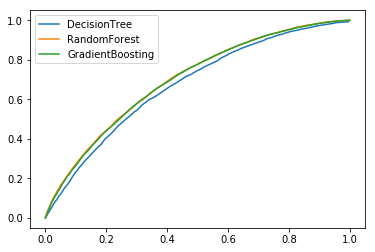

In [160]:
from sklearn.metrics import roc_curve
#Predict probabilities
prob_dt=dt.predict_proba(X_test)
prob_dt = prob_dt[:, 1]
prob_rf=rf.predict_proba(X_test)
prob_rf = prob_rf[:, 1]
prob_gbc=gbc.predict_proba(X_test)
prob_gbc = prob_gbc[:, 1]


dt_fpr, dt_tpr, _ = roc_curve(y_test, prob_dt)
rf_fpr, rf_tpr, _ = roc_curve(y_test, prob_rf)
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, prob_gbc)

plt.plot(dt_fpr, dt_tpr,  label='DecisionTree')
plt.plot(rf_fpr, rf_tpr,  label='RandomForest')
plt.plot(gbc_fpr, gbc_tpr, label='GradientBoosting')
plt.legend()
plt.show()

GradientBoosting fits better here

### With XGBoost

In [173]:
import xgboost as xgb

In [174]:
from xgboost import XGBClassifier
xgbc= XGBClassifier()
xgbc.fit(X_train, y_train)
xgbc_pred = xgbc.predict(X_test)

In [175]:
print('XGBoost')
print('accuracy_score is ',accuracy_score(y_test,xgbc_pred))
print('recall_score is ',recall_score(y_test,xgbc_pred))
print('precision_score is ',precision_score(y_test,xgbc_pred))

XGBoost
accuracy_score is  0.8328915210841425
recall_score is  0.012940995224156525
precision_score is  0.6064981949458483


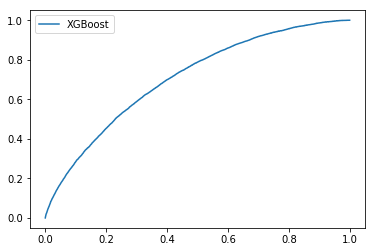

In [176]:
prob_xg=xgbc.predict_proba(X_test)
prob_xg = prob_xg[:, 1]
xg_fpr, xg_tpr, _ = roc_curve(y_test, prob_xg)
plt.plot(xg_fpr, xg_tpr, label='XGBoost')
plt.legend()
plt.show()

With validation

In [270]:
X_train1, X_test1, y_train1, y_test1= train_test_split(df_data[X], y, test_size=0.7, random_state=42)

X_train1, X_val1, y_train1, y_val1= train_test_split(X_train1, y_train1, test_size=0.5, random_state=42)

In [183]:
dtrain = xgb.DMatrix(X_train1, y_train1, missing = np.NAN)
dvalid = xgb.DMatrix(X_val1, y_val1, missing = np.NAN)
dtest = xgb.DMatrix(X_test1, y_test1, missing = np.NAN)

In [184]:
params = {"objective": "binary:logistic", 
          "booster" : "gbtree", 
          "eta": 0.05, 
          "max_depth": 6, 
          "subsample": 0.6, 
          "colsample_bytree": 0.7,
          #"colsample_bylevel": 0.6,
          "silent": 1, 
          "seed": 1234, 
          "eval_metric": "auc",
          #"gamma": 1, 
          "min_child_weight": 5} 

In [185]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
num_boost_round = 1500
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist,\
  early_stopping_rounds= 50)

[0]	train-auc:0.685956	eval-auc:0.664634
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.692638	eval-auc:0.673521
[2]	train-auc:0.70523	eval-auc:0.677836
[3]	train-auc:0.710128	eval-auc:0.683586
[4]	train-auc:0.71522	eval-auc:0.683543
[5]	train-auc:0.717124	eval-auc:0.685027
[6]	train-auc:0.719052	eval-auc:0.687529
[7]	train-auc:0.721391	eval-auc:0.688058
[8]	train-auc:0.723195	eval-auc:0.689109
[9]	train-auc:0.726694	eval-auc:0.689771
[10]	train-auc:0.728606	eval-auc:0.691376
[11]	train-auc:0.72891	eval-auc:0.692035
[12]	train-auc:0.729051	eval-auc:0.692185
[13]	train-auc:0.729479	eval-auc:0.693262
[14]	train-auc:0.730009	eval-auc:0.693915
[15]	train-auc:0.731137	eval-auc:0.694457
[16]	train-auc:0.732401	eval-auc:0.694887
[17]	train-auc:0.734605	eval-auc:0.695836
[18]	train-auc:0.735238	eval-auc:0.696131
[19]	train-auc:0.73604	eval-auc:0.696237
[20]	train-auc:0.737658	eval-auc:

[191]	train-auc:0.836707	eval-auc:0.707482
[192]	train-auc:0.837079	eval-auc:0.707501
[193]	train-auc:0.837256	eval-auc:0.707441
[194]	train-auc:0.837576	eval-auc:0.707501
[195]	train-auc:0.838328	eval-auc:0.70737
[196]	train-auc:0.839052	eval-auc:0.707391
[197]	train-auc:0.8392	eval-auc:0.707468
[198]	train-auc:0.839369	eval-auc:0.707568
[199]	train-auc:0.839495	eval-auc:0.707596
[200]	train-auc:0.839842	eval-auc:0.707669
[201]	train-auc:0.840501	eval-auc:0.707581
[202]	train-auc:0.840741	eval-auc:0.707571
[203]	train-auc:0.841367	eval-auc:0.707527
[204]	train-auc:0.841681	eval-auc:0.70762
[205]	train-auc:0.841995	eval-auc:0.707605
[206]	train-auc:0.842603	eval-auc:0.70769
[207]	train-auc:0.84313	eval-auc:0.707721
[208]	train-auc:0.843774	eval-auc:0.707795
[209]	train-auc:0.843974	eval-auc:0.70771
[210]	train-auc:0.844265	eval-auc:0.70765
[211]	train-auc:0.844408	eval-auc:0.70756
[212]	train-auc:0.844504	eval-auc:0.707534
[213]	train-auc:0.844735	eval-auc:0.707526
[214]	train-auc:0.84

In [189]:
from sklearn.metrics import roc_curve, auc
from sklearn import linear_model, datasets
import pylab as pl
def draw_ROC(model, dtrain, dvalid, dtest, y_train1, y_val1, y_test1 ):
    probas_ = model.predict(dvalid, ntree_limit=model.best_ntree_limit)
    probas_1 = model.predict(dtrain, ntree_limit=model.best_ntree_limit)
    probas_2 = model.predict(dtest, ntree_limit=model.best_ntree_limit)
    fpr, tpr, thresholds = roc_curve(y_val1, probas_)
    fpr_1, tpr_1, thresholds_1 = roc_curve(y_train1, probas_1)
    fpr_2, tpr_2, thresholds_2 = roc_curve(y_test1, probas_2)
    roc_auc = auc(fpr, tpr)
    roc_auc_1 = auc(fpr_1, tpr_1)
    roc_auc_2 = auc(fpr_2, tpr_2)
    print ("Area under the ROC curve - validation: %f" % roc_auc)
    print ("Area under the ROC curve - train: %f" % roc_auc_1)
    print ("Area under the ROC curve - test: %f" % roc_auc_2)
    # Plot ROC curve
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, label='ROC curve - valid(AUC = %0.2f)' % roc_auc, color='r')
    plt.plot(fpr_1, tpr_1, label='ROC curve - train (AUC = %0.2f)' % roc_auc_1, color='b')
    plt.plot(fpr_2, tpr_2, label='ROC curve - test (AUC = %0.2f)' % roc_auc_2, color='g')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for lead score model')
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve - validation: 0.707836
Area under the ROC curve - train: 0.827126
Area under the ROC curve - test: 0.704576


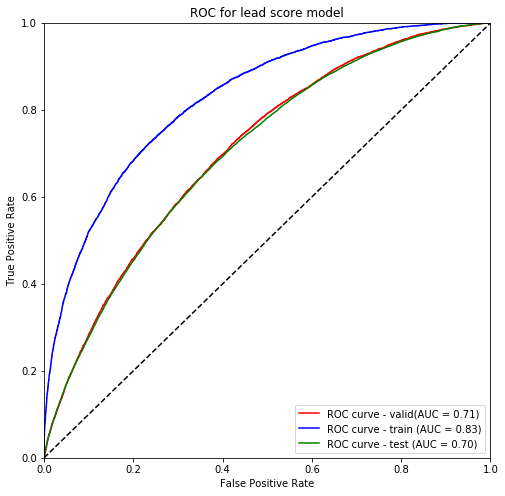

In [190]:
draw_ROC(gbm, dtrain, dvalid, dtest, y_train1, y_val1, y_test1)

Feature importance

In [194]:
def get_xgb_imp(xgb, feat_names):
    imp_vals = gbm.get_fscore()
    feats_imp = pd.DataFrame(imp_vals,index=np.arange(2)).T
    feats_imp.iloc[:,0]= feats_imp.index    
    feats_imp.columns=['feature','importance']
    feats_imp.sort_values('importance',inplace=True,ascending=False)
    feats_imp.reset_index(drop=True,inplace=True)
    return feats_imp

feature_importance_df = get_xgb_imp(xgb, list(df_all))

In [209]:
feature_importance_df['fscore'] = feature_importance_df['importance'] / feature_importance_df['importance'].sum()
feature_importance_df.sort_values(['fscore'], ascending=False, inplace=True)
feature_importance_df=feature_importance_df.drop(['importance'], axis=1)

[Text(0, 0, 'installment'),
 Text(0, 0, 'dti'),
 Text(0, 0, 'intrate'),
 Text(0, 0, 'mosinoldrevtlop'),
 Text(0, 0, 'annualinc'),
 Text(0, 0, 'avgcurbal'),
 Text(0, 0, 'bcutil'),
 Text(0, 0, 'totalrevhilim'),
 Text(0, 0, 'revolbal'),
 Text(0, 0, 'tothicredlim'),
 Text(0, 0, 'maxbalbc'),
 Text(0, 0, 'zipcode_freq_encode'),
 Text(0, 0, 'emptitle_freq_encode'),
 Text(0, 0, 'mosinoldilacct'),
 Text(0, 0, 'earliestcrline_new'),
 Text(0, 0, 'bcopentobuy'),
 Text(0, 0, 'totcurbal'),
 Text(0, 0, 'totalbclimit'),
 Text(0, 0, 'totalbalexmort'),
 Text(0, 0, 'loanamnt')]

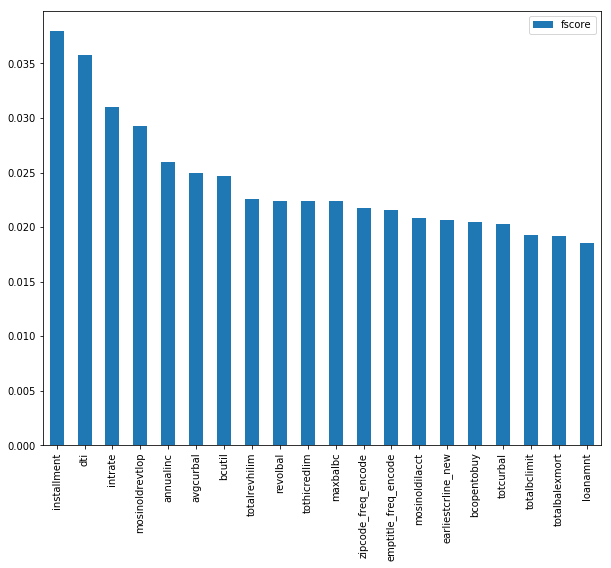

In [238]:
df_imp_plt=feature_importance_df[:20]
fig, ax = plt.subplots()
df_imp_plt.plot(ax=ax,xticks=df_imp_plt.index,kind='bar',figsize=(10,8))
ax.set_xticklabels(df_imp_plt.feature)


In [236]:
df_imp_plt

,feature,fscore
1,installment,0.037950
2,dti,0.035778
3,intrate,0.031050
4,mosinoldrevtlop,0.029261
5,annualinc,0.025939
6,avgcurbal,0.024917
7,bcutil,0.024661
8,totalrevhilim,0.022617
11,revolbal,0.022361
9,tothicredlim,0.022361


In [239]:
import pickle
filename = 'gbm_model.sav'
pickle.dump(gbm, open(filename, 'wb'))

## Bayesian Optimization with XGBoost

In [298]:
from bayes_opt import BayesianOptimization
frame1 = [X_train1, X_val1]
frame2 = [y_train1, y_val1]

train_x = pd.concat(frame1)
train_y = pd.concat(frame2)

xgtrain = xgb.DMatrix(train_x, label=train_y, missing = np.NAN)  

def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma):
    params = dict()
    params['objective'] = 'binary:logistic'
    params['eta'] = 0.05
    params['max_depth'] = int(max_depth )   
    params['min_child_weight'] = int(min_child_weight)
    params['colsample_bytree'] = colsample_bytree
    params['subsample'] = subsample
    params['gamma'] = gamma
    params['verbose_eval'] = False 



    cv_result = xgb.cv(params, xgtrain,
                       num_boost_round=500,
                       nfold=3,
                       metrics={'auc'},
                       seed=1234
                       )
    print(cv_result)

    return cv_result['test-auc-mean'].max()

In [299]:
xgb_BO = BayesianOptimization(xgb_evaluate, 
                             {'max_depth': (4, 8),
                              'min_child_weight': (0, 20),
                              'colsample_bytree': (0.2, 0.8),
                              'subsample': (0.5, 1),
                              'gamma': (0, 1)
                             }
                            )


In [300]:
xgb_BO.maximize(init_points=3, n_iter=4, acq='ei')

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------
     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.677490       0.001029       0.671879      0.005042
1          0.681417       0.001865       0.673520      0.004187
2          0.684272       0.003112       0.674617      0.006746
3          0.685855       0.002218       0.675011      0.005629
4          0.686997       0.001991       0.677015      0.007375
5          0.690329       0.001849       0.680262      0.006450
6          0.689893       0.003390       0.679622      0.008613
7          0.691439       0.001054       0.680977      0.007276
8          0.692280       0.001070       0.682136      0.006815
9          0.693569       0.001234       0.682579      0.006992
10         0.694285       0.001809       0.682765      0.006815
11         0.695331       0.001488       0.683512      0.005

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.694033       0.002294       0.666685      0.002734
1          0.705425       0.001807       0.673335      0.003989
2          0.714928       0.000902       0.680158      0.003747
3          0.717627       0.001159       0.682338      0.004167
4          0.721973       0.000966       0.684118      0.004669
5          0.725411       0.001457       0.686258      0.004415
6          0.726651       0.000305       0.686677      0.004822
7          0.727791       0.001505       0.687619      0.004592
8          0.729272       0.001645       0.688720      0.004690
9          0.730461       0.002143       0.688762      0.004571
10         0.731974       0.003671       0.689139      0.004301
11         0.733511       0.003007       0.689521      0.003668
12         0.735032       0.003394       0.690061      0.003473
13         0.736474       0.003329       0.690587      0.003418
14         0.738170       0.002569      

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.677664       0.000664       0.671285      0.005729
1          0.683358       0.001402       0.676089      0.002409
2          0.687486       0.001898       0.679808      0.005480
3          0.690233       0.000693       0.681846      0.005236
4          0.691138       0.000211       0.682632      0.005537
5          0.691909       0.000354       0.683346      0.004962
6          0.692518       0.000677       0.684218      0.004199
7          0.692802       0.000757       0.684541      0.004527
8          0.693115       0.000888       0.684763      0.004105
9          0.693179       0.001322       0.685079      0.003906
10         0.693573       0.002003       0.685467      0.003477
11         0.694097       0.001729       0.685573      0.003530
12         0.694436       0.001267       0.685604      0.003703
13         0.694967       0.001466       0.685784      0.003909
14         0.695686       0.001758      

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.678284       0.000802       0.671750      0.005324
1          0.683341       0.003250       0.676691      0.003493
2          0.686749       0.000786       0.679024      0.004986
3          0.687244       0.000571       0.680257      0.004961
4          0.688242       0.000754       0.681081      0.005284
5          0.689426       0.000753       0.681752      0.005155
6          0.690195       0.000615       0.682336      0.004713
7          0.690965       0.000748       0.682888      0.004427
8          0.691578       0.000879       0.683255      0.004205
9          0.692097       0.000889       0.683904      0.004367
10         0.693223       0.001231       0.684475      0.004120
11         0.693722       0.001324       0.684589      0.003990
12         0.694200       0.000772       0.684900      0.004186
13         0.694899       0.001039       0.685411      0.004055
14         0.695196       0.001212      

In [307]:
xgb_BO.max

{'target': 0.7089076666666667,
 'params': {'colsample_bytree': 0.6892786418762147,
  'gamma': 0.5421181439601204,
  'max_depth': 4.331225118257002,
  'min_child_weight': 19.164952423300743,
  'subsample': 0.7475315637469417}}

In [323]:
params=xgb_BO.max['params']
params['max_depth']= int(params['max_depth'])
params['eval_metric']='auc'
params

{'colsample_bytree': 0.6892786418762147,
 'gamma': 0.5421181439601204,
 'max_depth': 4,
 'min_child_weight': 19.164952423300743,
 'subsample': 0.7475315637469417,
 'eval_metric': 'auc'}

In [324]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
num_boost_round=1000
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=50)

[0]	train-auc:0.678074	eval-auc:0.672725
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.684316	eval-auc:0.677624
[2]	train-auc:0.689925	eval-auc:0.681191
[3]	train-auc:0.695726	eval-auc:0.686995
[4]	train-auc:0.698846	eval-auc:0.68847
[5]	train-auc:0.701728	eval-auc:0.690193
[6]	train-auc:0.706404	eval-auc:0.693187
[7]	train-auc:0.710891	eval-auc:0.694366
[8]	train-auc:0.714718	eval-auc:0.69582
[9]	train-auc:0.716219	eval-auc:0.696386
[10]	train-auc:0.71913	eval-auc:0.696546
[11]	train-auc:0.721072	eval-auc:0.697359
[12]	train-auc:0.721839	eval-auc:0.697323
[13]	train-auc:0.723892	eval-auc:0.697633
[14]	train-auc:0.72541	eval-auc:0.698796
[15]	train-auc:0.7271	eval-auc:0.69892
[16]	train-auc:0.728744	eval-auc:0.698674
[17]	train-auc:0.729502	eval-auc:0.698479
[18]	train-auc:0.731025	eval-auc:0.699014
[19]	train-auc:0.732272	eval-auc:0.698941
[20]	train-auc:0.733738	eval-auc:0.6

In [326]:
params['n_estimators']=18

clf_train = xgb.XGBClassifier(**params)

clf_train.fit(train_x, train_y)

XGBClassifier(colsample_bytree=0.6892786418762147, eval_metric='auc',
              gamma=0.5421181439601204, max_depth=4,
              min_child_weight=19.164952423300743, n_estimators=18,
              subsample=0.7475315637469417)

Area under the ROC curve - validation: 0.699014
Area under the ROC curve - train: 0.731024
Area under the ROC curve - test: 0.694702


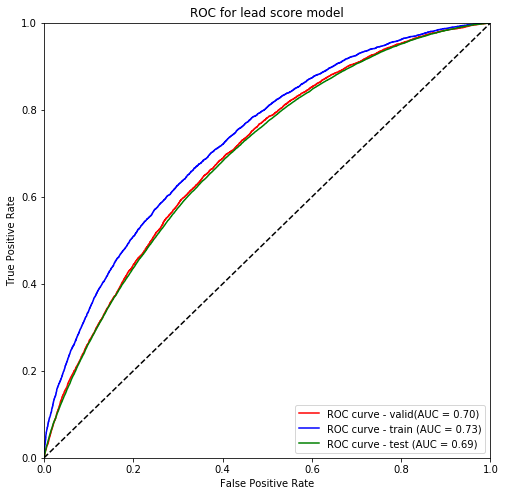

In [327]:
draw_ROC(gbm, dtrain, dvalid, dtest, y_train1, y_val1, y_test1)

In [330]:
feature_importance_df1 = get_xgb_imp(xgb, list(df_all))
feature_importance_df1['fscore'] = feature_importance_df1['importance'] / feature_importance_df1['importance'].sum()
feature_importance_df1.sort_values(['fscore'], ascending=False, inplace=True)
feature_importance_df1=feature_importance_df1.drop(['importance'], axis=1)
df1_imp_plt=feature_importance_df1[:20]

Feature importance

In [338]:
df1_imp_plt

,feature,fscore
0,installment,0.052375
2,dti,0.036541
3,intrate,0.036541
4,mosinoldrevtlop,0.028015
5,bcutil,0.025579
6,tothicredlim,0.024361
7,emptitle_freq_encode,0.023143
8,allutil,0.021924
9,revolutil,0.020706
10,mthssincercntil,0.020706


[Text(0, 0, 'installment'),
 Text(0, 0, 'dti'),
 Text(0, 0, 'intrate'),
 Text(0, 0, 'mosinoldrevtlop'),
 Text(0, 0, 'bcutil'),
 Text(0, 0, 'tothicredlim'),
 Text(0, 0, 'emptitle_freq_encode'),
 Text(0, 0, 'allutil'),
 Text(0, 0, 'revolutil'),
 Text(0, 0, 'mthssincercntil'),
 Text(0, 0, 'annualinc'),
 Text(0, 0, 'totalbclimit'),
 Text(0, 0, 'pcttlnvrdlq'),
 Text(0, 0, 'totalrevhilim'),
 Text(0, 0, 'mosinoldilacct'),
 Text(0, 0, 'totalbalexmort'),
 Text(0, 0, 'addrstate_freq_encode'),
 Text(0, 0, 'totalilhighcreditlimit'),
 Text(0, 0, 'revolbal'),
 Text(0, 0, 'ilutil')]

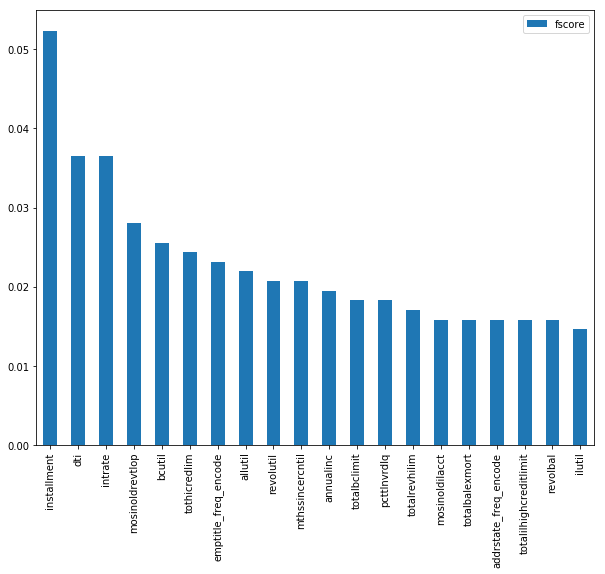

In [339]:
fig, ax = plt.subplots()
df1_imp_plt.plot(ax=ax,xticks=df1_imp_plt.index,kind='bar',figsize=(10,8))
ax.set_xticklabels(df1_imp_plt.feature)

In [340]:
filename = 'gbm_mode2.sav'
pickle.dump(gbm, open(filename, 'wb'))